# Table of Contents
 <p><div class="lev1"><a href="#Single-loop"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single loop</a></div><div class="lev1"><a href="#Many-LEFs"><span class="toc-item-num">2&nbsp;&nbsp;</span>Many LEFs</a></div><div class="lev1"><a href="#Statistics-of-loop-arrays."><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics of loop arrays.</a></div><div class="lev1"><a href="#Visualize-loops"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize loops</a></div>

In [1]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

# Single loop

In [3]:
p = {}
p['L'] = 100
p['N'] = 1
p['R_OFF'] = 1.0 / 100
p['R_EXTEND'] = float(1.0)
p['R_SHRINK'] = 0#float(.4)
p['R_SWITCH'] =  0.03

p['T_MAX_LIFETIMES'] = 3.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 300
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


b'proc' 10 16.329181092003992 300.0
b'proc' 20 28.73286269474227 300.0
b'proc' 30 42.975000729999145 300.0
b'proc' 40 56.69350147156173 300.0
b'proc' 50 71.8896222336515 300.0
b'proc' 60 84.35288985093617 300.0
b'proc' 70 99.08340043435794 300.0
b'proc' 80 111.9465497898522 300.0
b'proc' 90 128.98189815889398 300.0
b'proc' 100 147.51330859276715 300.0
b'proc' 110 161.9165788090738 300.0
b'proc' 120 177.9320139361515 300.0
b'proc' 130 204.2748078511807 300.0
b'proc' 140 225.94474285897923 300.0
b'proc' 150 299.449619612594 300.0
b'proc' 160 312.94629771681224 300.0
b'proc' 170 331.3103030853541 300.0
b'proc' 180 348.5916353686192 300.0
b'proc' 190 362.42686397111765 300.0
b'proc' 200 382.02538590477354 300.0
b'proc' 210 406.3763773159685 300.0
b'proc' 220 428.1985580520058 300.0
b'proc' 230 448.14852315944586 300.0
b'proc' 240 466.6727983876364 300.0
b'proc' 250 486.4013963015051 300.0
b'proc' 260 508.5586023335668 300.0
b'proc' 270 532.9382849260847 300.0
b'proc' 280 551.6247577368017 

(0.0, 100.0)

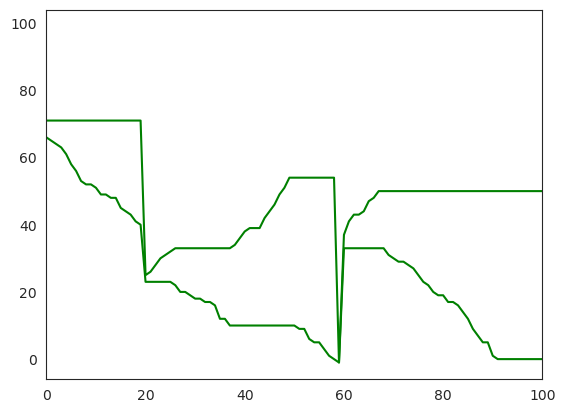

In [4]:
n=0
plt.plot(
    l_sites[:,n], c='g')
plt.plot(
    r_sites[:,n], c='g')

plt.xlim(0,100)

# Many LEFs

In [5]:
p = {}
p['L'] = 20000
p['N'] = 300
p['R_OFF'] = 1.0 / 1000.0
p['R_EXTEND'] = float(2.0)
p['R_SHRINK'] = float(0.1)

p['R_SWITCH'] = p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 200
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


b'proc' 10 5000.014089930044 100000.0
b'proc' 20 10000.030593198557 100000.0
b'proc' 30 15000.052999087404 100000.0
b'proc' 40 20000.075310196513 100000.0
b'proc' 50 25000.090875875798 100000.0
b'proc' 60 30000.110421986352 100000.0
b'proc' 70 35000.13432311663 100000.0
b'proc' 80 40000.150119324804 100000.0
b'proc' 90 45000.17170072372 100000.0
b'proc' 100 50000.18435004733 100000.0
b'proc' 110 55000.198431621175 100000.0
b'proc' 120 60000.22201233983 100000.0
b'proc' 130 65000.2362105935 100000.0
b'proc' 140 70000.24605143676 100000.0
b'proc' 150 75000.26342941268 100000.0
b'proc' 160 80000.29375194557 100000.0
b'proc' 170 85000.31026122067 100000.0
b'proc' 180 90000.32579092949 100000.0
b'proc' 190 95000.35126449508 100000.0
b'proc' 200 100000.37016724667 100000.0


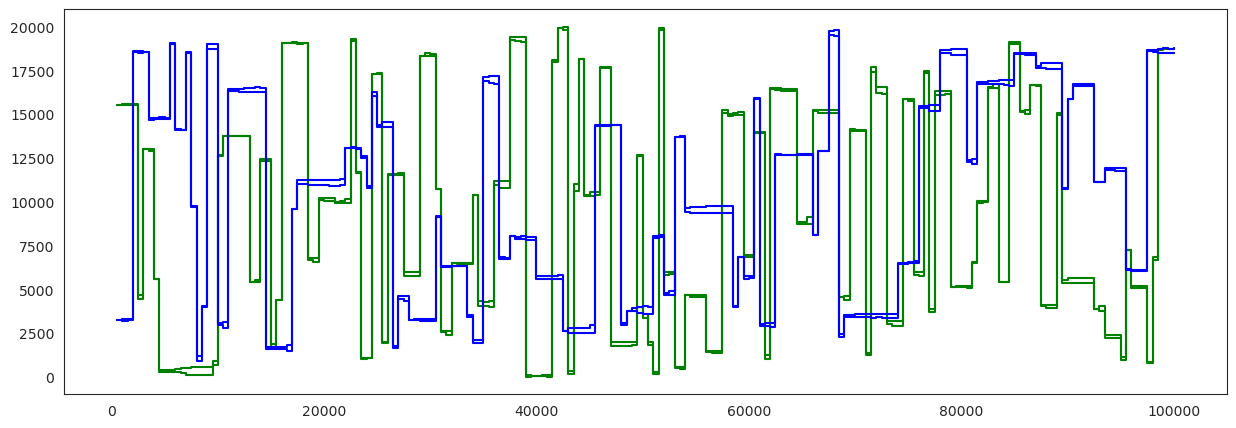

In [6]:
plt.figure(figsize=(15,5))
n=0
plt.step(
    ts,
    l_sites[:,n], c='g',where='post',)
plt.step(
    ts,
    r_sites[:,n], c='g',where='post',)


n=1
plt.step(
    ts,
    l_sites[:,n], c='b',
    where='post',)
plt.step(
    ts,
    r_sites[:,n], c='b',
    where='post',)

# Statistics of loop arrays.

In [7]:
import collections


In [8]:
t=-1
parents = looptools.get_parent_loops(
            l_sites[t], 
            r_sites[t])
root_loops_idxs = np.where(parents == -1)[0]
children = looptools.get_loop_branches(parents)

(array([20.,  9.,  9.,  9., 10.,  7.,  6., 10.,  6.,  3.,  5.,  4.,  5.,
         1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([  1. ,  34.2,  67.4, 100.6, 133.8, 167. , 200.2, 233.4, 266.6,
        299.8, 333. , 366.2, 399.4, 432.6, 465.8, 499. , 532.2, 565.4,
        598.6, 631.8, 665. ]),
 <BarContainer object of 20 artists>)

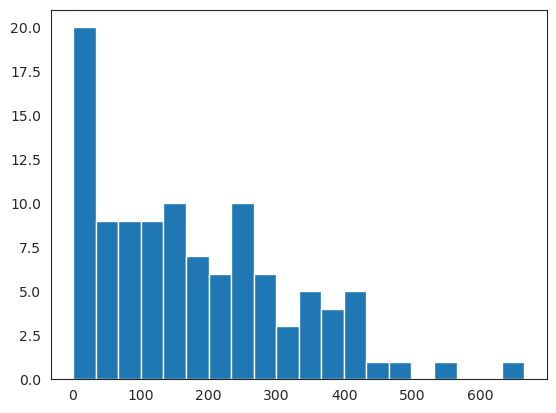

In [9]:
plt.hist(
    r_sites[t][root_loops_idxs] - l_sites[t][root_loops_idxs],
    bins=20)

# Visualize loops

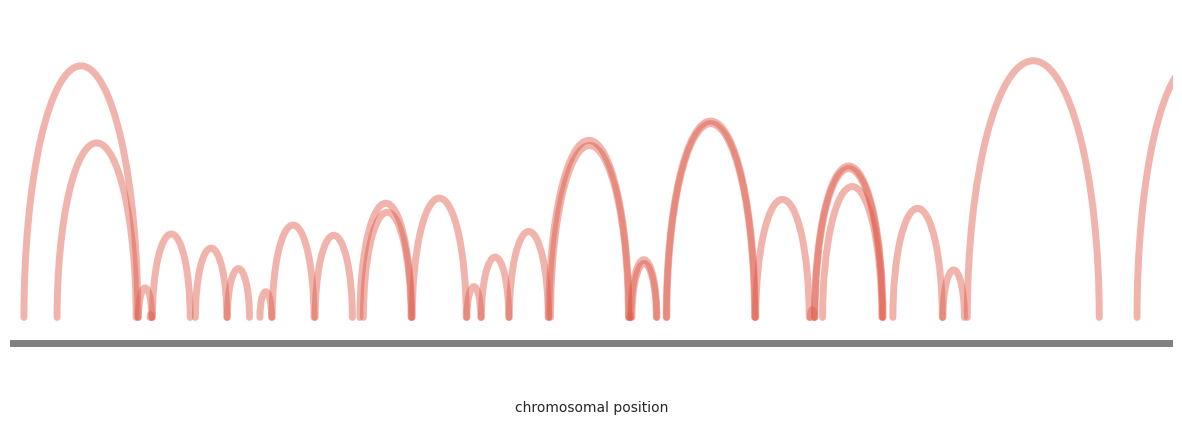

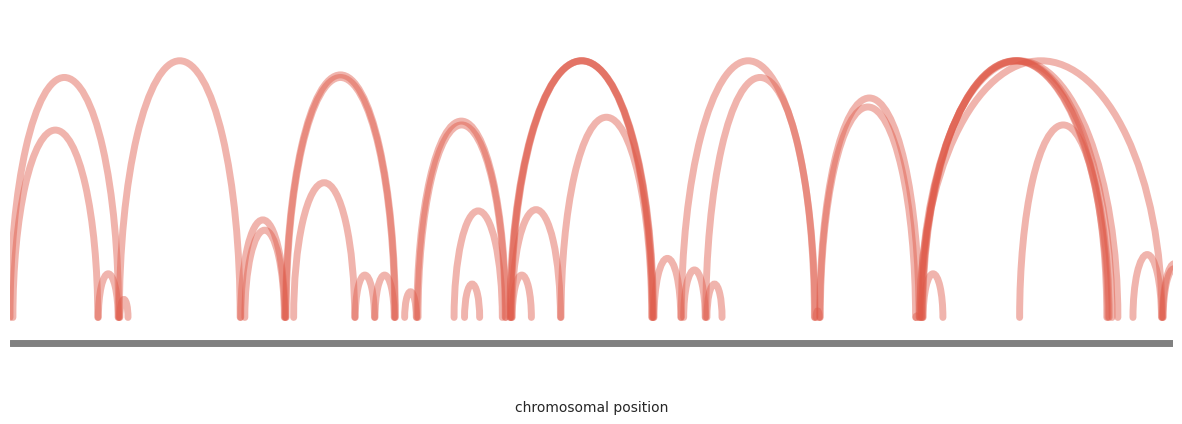

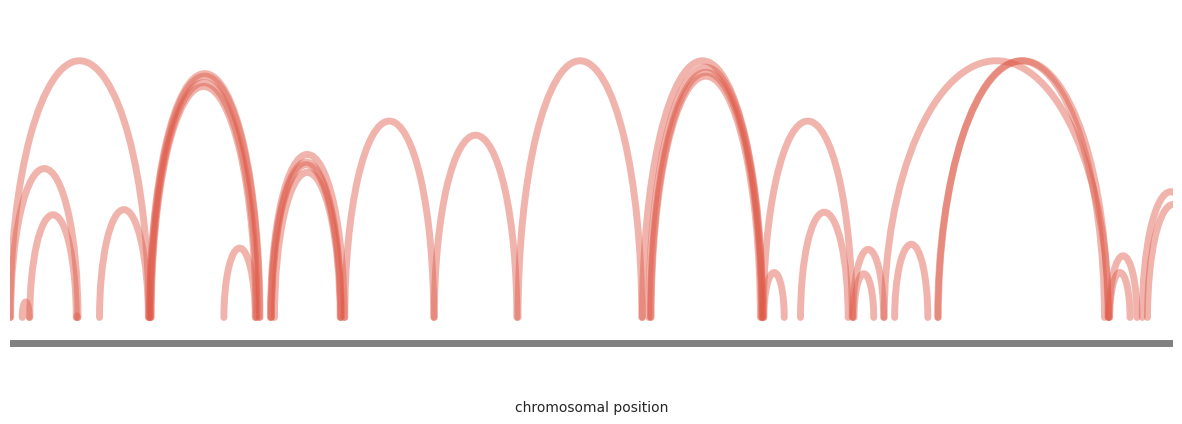

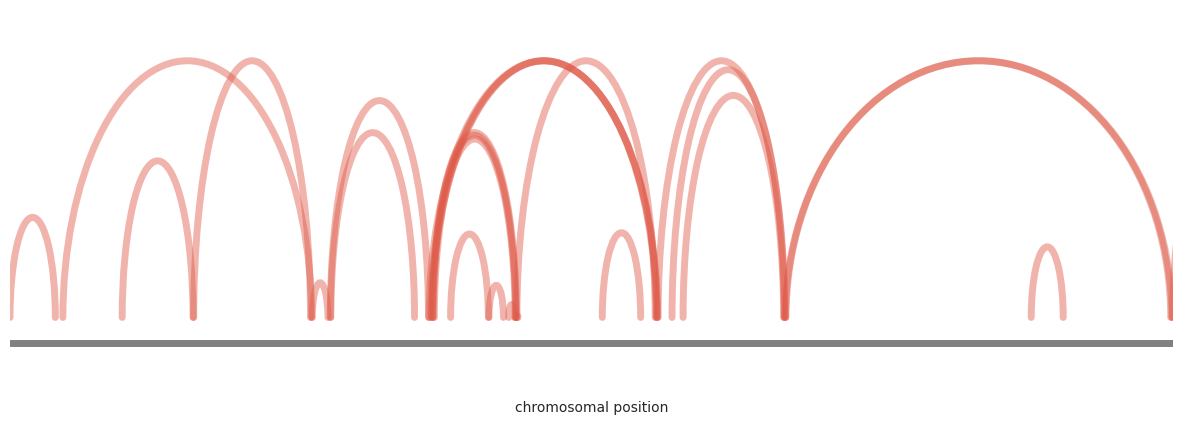

In [10]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=2.0)
    plt.xlim(0,p['L']//10)
    plt.xticks([])
    plt.xlabel('chromosomal position')

Text(0.5, 0, 'chromosomal position')

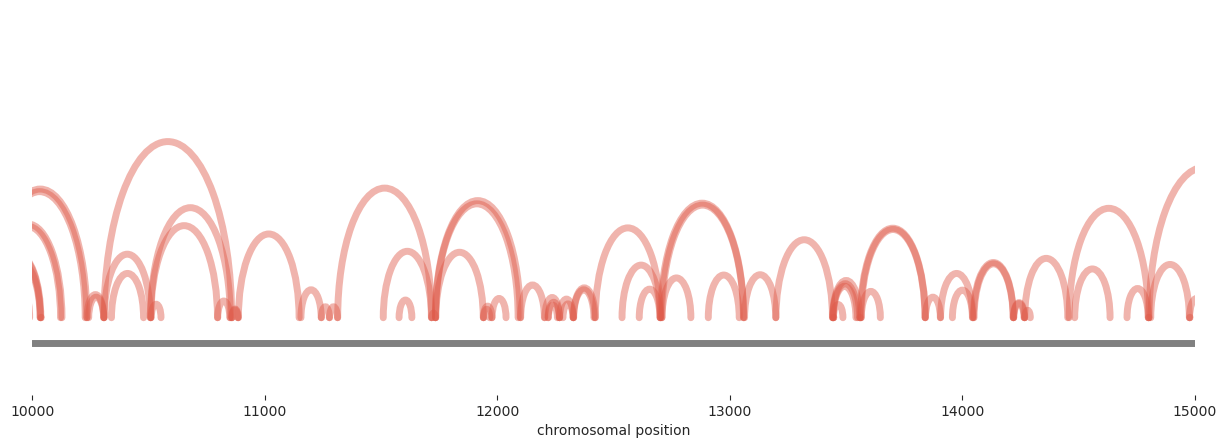

In [11]:
loopviz.prepare_canvas(p['L'])

loopviz.plot_lefs(
    l_sites=l_sites[-1,:], 
    r_sites=r_sites[-1,:], 
    colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
    max_height=200,
    plot_text=False,
    height_factor=0.5)
plt.xlim(10000,15000)
plt.xlabel('chromosomal position')